In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 214 GB / percent used: 14.8 %


# Check model data

In [2]:
path = '/ccc/store/cont003/thredds/p86caub/ICOLMDZOR/PROD/highresSST-present/CM7A-HR-v1.11.highresSST-present'
path_CM6 = '/bdd/CMIP6/HighResMIP/IPSL/IPSL-CM6A-ATM-HR/highresSST-present/r1i1p1f1'

folder = 'ATM'
var_LMDZ = 't2m'

In [3]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_LMDZ+'.nc')

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 360, lon: 720, presnivs: 79, time_counter: 780)
Coordinates:
  * lat                   (lat) float32 -90.0 -89.498604 ... 89.498604 90.0
  * lon                   (lon) float32 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * presnivs              (presnivs) float32 101202.11 100942.43 ... 1.4834349
  * time_counter          (time_counter) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
    time_centered         (time_counter) datetime64[ns] ...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    aire                  (time_counter, lat, lon) float32 ...
    t2m                   (time_counter, lat, lon) float32 ...
Attributes:
    name:         histmth
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2020-Jan-24 08:26:05 GMT
    uuid:         27ce6bdc-cbd2-4766-8ff0-99517e4a1700
    LongName:     IPSLCM6.1.11-LR

In [4]:
xr.open_dataset(path_CM6+'/Amon/tas/gr/latest/tas_Amon_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc')

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 361, lon: 512, time: 780)
Coordinates:
  * lat          (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon          (lon) float32 0.0 0.703125 1.40625 ... 358.59375 359.29688
    height       float64 ...
  * time         (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    tas          (time, lat, lon) float32 ...
Attributes:
    name:                  /ccc/work/cont003/gencmip6/p86ghatt/IGCM_OUT/LMDZO...
    Conventions:           CF-1.7 CMIP-6.2
    creation_date:         2018-09-20T11:33:50Z
    tracking_id:           hdl:21.14100/4e361f14-83d5-4356-a0f7-93c8c818b68b
    description:           Forced global atmosphere-land simulations using da...
    title:                 IPSL-CM6A-ATM-HR model output prepared for CMIP6 /...
    activity_id:           HighResMIP
    contact:               ipsl-cmip6@listes.ipsl.fr
    data_specs_version:    01.00.21
    dr2xml_version:        1.12
    experiment_id:         highresSST-present
    experiment:            forced atmosphere experiment for 1950-2014
    external_variables:    areacella
    forcing_index:         1
    frequency:             mon
    further_info_url:      https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM6...
    grid:                  LMDZ grid
    grid_label:            gr
    nominal_resolution:    50 km
    initialization_index:  1
    institution_id:        IPSL
    institution:           Institut Pierre Simon Laplace, Paris 75252, France
    license:               CMIP6 model data produced by IPSL is licensed unde...
    mip_era:               CMIP6
    physics_index:         1
    product:               model-output
    realization_index:     1
    realm:                 atmos
    source:                IPSL-CM6A-ATM-HR (2018):  atmos: LMDZ (NPv6, N256;...
    source_id:             IPSL-CM6A-ATM-HR
    source_type:           AGCM
    sub_experiment_id:     none
    sub_experiment:        none
    table_id:              Amon
    variable_id:           tas
    variant_label:         r1i1p1f1
    EXPID:                 highresSST-present
    CMIP6_CV_version:      cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:         523ab9c7b70cfe3bc2c825d1e555e1d0
    model_version:         6.1.5
    branch_method:         no parent
    parent_activity_id:    no parent
    parent_experiment_id:  no parent
    parent_mip_era:        no parent
    parent_source_id:      no parent
    parent_time_units:     no parent
    history:               Wed Oct 24 15:20:05 2018: ncatted -O -a parent_var...
    NCO:                   "4.6.0"
    parent_variant_label:  no parent

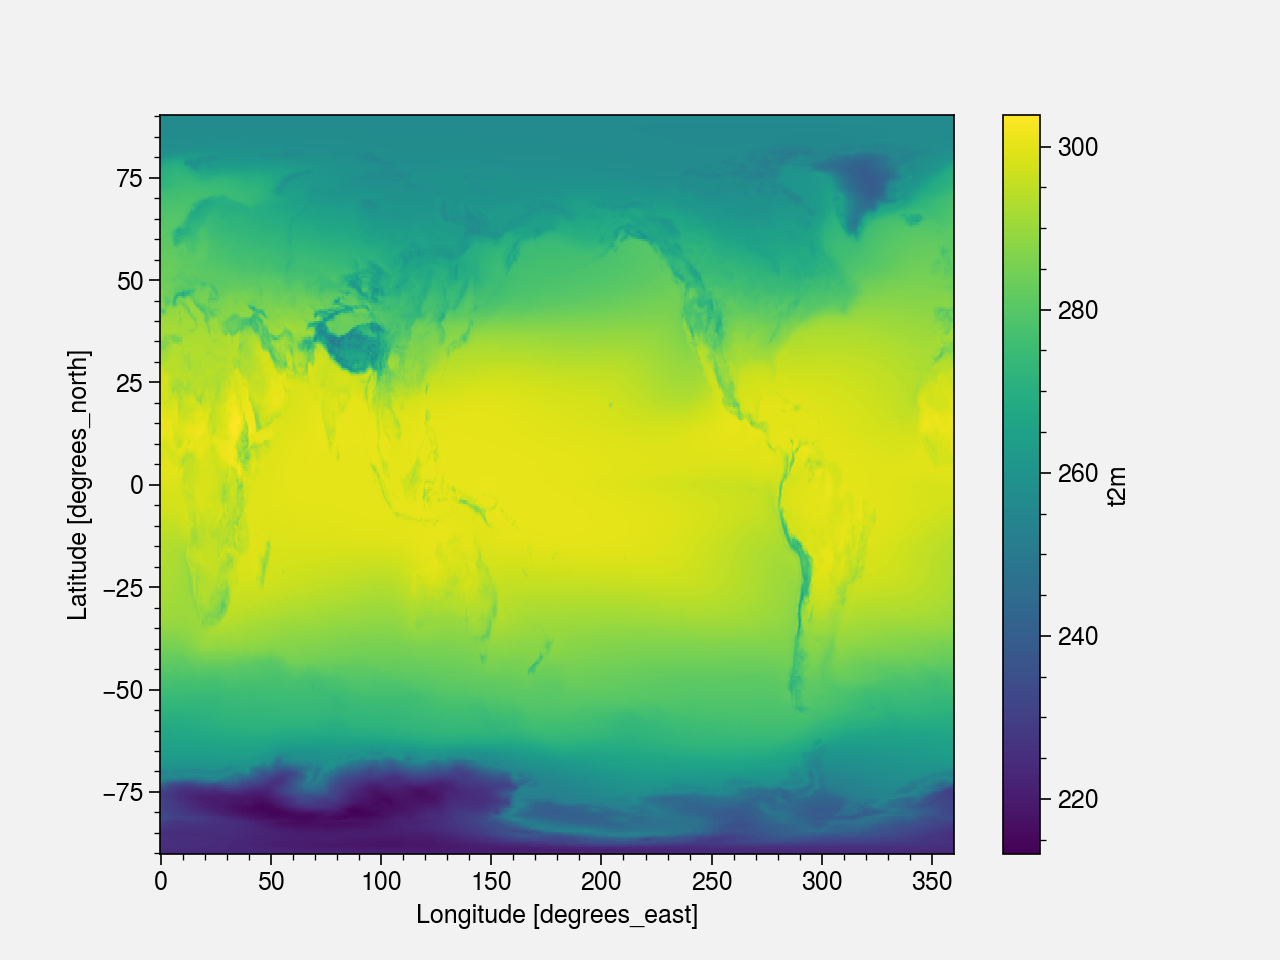

In [5]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').plot()

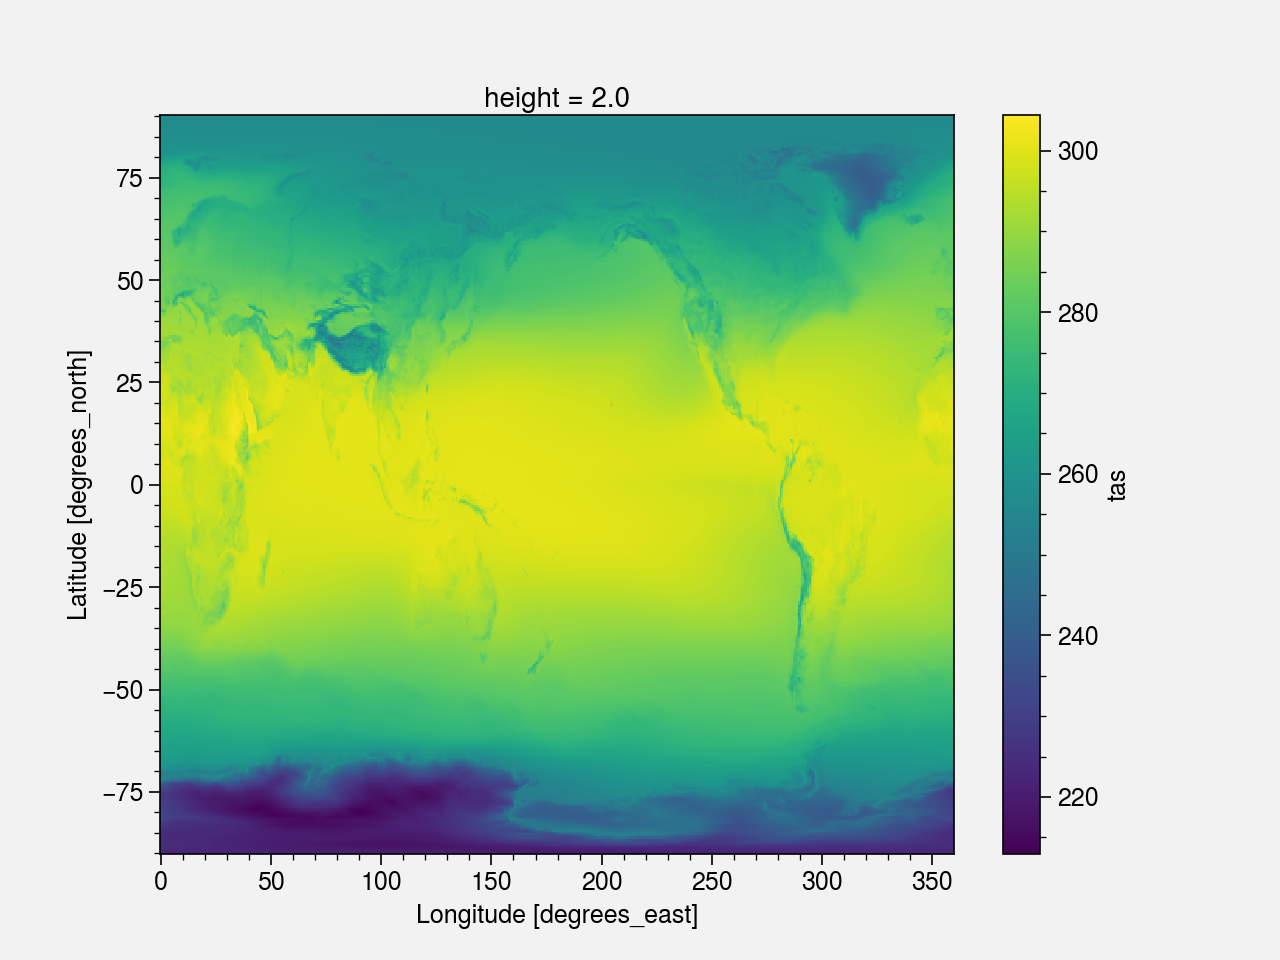

In [6]:
xr.open_dataset(path_CM6+'/Amon/tas/gr/latest/tas_Amon_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc')['tas'].mean('time').plot()

# Define period and zone

In [4]:
# Define common period
period = slice('1981','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

var = 'tas'
label = 'Near-Surface Air Temperature'
units = '°C'
cmap='CoolWarm'
levels=plot.arange(-30,30,5)

# Get model data guided and not guided

In [5]:
model_CM7 = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model_CM7 = model_CM7.rename({'time_counter': 'time'}) - 273.15
model_CM7.attrs['units'] = '°C'
model_CM7

<xarray.DataArray 't2m' (time: 408, lat: 360, lon: 720)>
array([[[-29.601944, -29.601944, -29.601944, ..., -29.601944,
         -29.601944, -29.601944],
        [-28.945007, -28.980911, -28.982574, ..., -28.91066 ,
         -28.910522, -28.9104  ],
        [-28.35553 , -28.419296, -28.424438, ..., -28.28949 ,
         -28.291504, -28.293716],
        ...,
        [-34.049896, -34.049896, -34.049942, ..., -34.049988,
         -34.049942, -34.049896],
        [-34.090897, -34.090897, -34.090897, ..., -34.09091 ,
         -34.090897, -34.090897],
        [-34.216507, -34.216507, -34.216507, ..., -34.216507,
         -34.216507, -34.216507]],

       [[-44.446808, -44.446808, -44.446808, ..., -44.446808,
         -44.446808, -44.446808],
        [-44.027786, -44.056946, -44.05835 , ..., -44.000046,
         -43.999893, -43.99974 ],
        [-43.764603, -43.872757, -43.88005 , ..., -43.64731 ,
         -43.652557, -43.657852],
        ...,
        [-27.847412, -27.847427, -27.847504, ..., -27.847641,
         -27.847504, -27.847427],
        [-27.925003, -27.925003, -27.925003, ..., -27.925018,
         -27.925003, -27.925003],
        [-28.16362 , -28.16362 , -28.16362 , ..., -28.16362 ,
         -28.16362 , -28.16362 ]],

       [[-51.570465, -51.570465, -51.570465, ..., -51.570465,
         -51.570465, -51.570465],
        [-50.361145, -50.397217, -50.401047, ..., -50.33435 ,
         -50.331924, -50.329575],
        [-49.73799 , -49.947174, -49.96556 , ..., -49.527115,
         -49.53253 , -49.5381  ],
        ...,
        [-29.219482, -29.219482, -29.219467, ..., -29.219437,
         -29.219467, -29.219482],
        [-29.11557 , -29.11557 , -29.11557 , ..., -29.11557 ,
         -29.11557 , -29.11557 ],
        [-29.191727, -29.191727, -29.191727, ..., -29.191727,
         -29.191727, -29.191727]],

       ...,

       [[-49.28244 , -49.28244 , -49.28244 , ..., -49.28244 ,
         -49.28244 , -49.28244 ],
        [-48.414093, -48.450882, -48.453033, ..., -48.38051 ,
         -48.379898, -48.379303],
        [-47.56494 , -47.60353 , -47.60904 , ..., -47.53389 ,
         -47.532333, -47.531067],
        ...,
        [-15.832672, -15.832672, -15.832764, ..., -15.832855,
         -15.832764, -15.832672],
        [-16.034058, -16.034058, -16.034058, ..., -16.034088,
         -16.034058, -16.034058],
        [-16.294678, -16.294678, -16.294678, ..., -16.294678,
         -16.294678, -16.294678]],

       [[-38.250443, -38.250443, -38.250443, ..., -38.250443,
         -38.250443, -38.250443],
        [-37.892242, -37.928345, -37.92981 , ..., -37.856995,
         -37.857086, -37.857162],
        [-37.528885, -37.58992 , -37.594788, ..., -37.46544 ,
         -37.467514, -37.469696],
        ...,
        [-23.493118, -23.493103, -23.493073, ..., -23.493027,
         -23.493073, -23.493103],
        [-23.3889  , -23.3889  , -23.3889  , ..., -23.3889  ,
         -23.3889  , -23.3889  ],
        [-23.331802, -23.331802, -23.331802, ..., -23.331802,
         -23.331802, -23.331802]],

       [[-26.63475 , -26.63475 , -26.63475 , ..., -26.63475 ,
         -26.63475 , -26.63475 ],
        [-26.287933, -26.328445, -26.329865, ..., -26.247559,
         -26.247894, -26.248215],
        [-25.956528, -26.049103, -26.055145, ..., -25.8553  ,
         -25.859985, -25.864746],
        ...,
        [-30.36023 , -30.360245, -30.36026 , ..., -30.36029 ,
         -30.36026 , -30.360245],
        [-30.216553, -30.216553, -30.216568, ..., -30.216614,
         -30.216568, -30.216553],
        [-30.223892, -30.223892, -30.223892, ..., -30.223892,
         -30.223892, -30.223892]]], dtype=float32)
Coordinates:
  * lat            (lat) float32 -90.0 -89.498604 -88.997215 ... 89.498604 90.0
  * lon            (lon) float32 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 359.0 359.5
  * time           (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
    time_centered  (time) datetime64[ns] ...
Attributes:
    units:    °C

In [8]:
model_CM7.time.values[0]

numpy.datetime64('1981-01-16T12:00:00.000000000')

In [9]:
model_CM6 = xr.open_dataset(
    path_CM6+'/Amon/tas/gr/latest/tas_Amon_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc'
)['tas'].sel(time=period) - 273.15
model_CM6.attrs['units'] = '°C'
model_CM6

<xarray.DataArray 'tas' (time: 408, lat: 361, lon: 512)>
array([[[-27.981476, -27.981476, -27.981476, ..., -27.981476,
         -27.981476, -27.981476],
        [-27.3358  , -27.459534, -27.453217, ..., -27.350159,
         -27.343628, -27.40126 ],
        [-27.044556, -27.130478, -27.11229 , ..., -27.04741 ,
         -27.02655 , -27.091583],
        ...,
        [-28.525269, -28.559708, -28.5206  , ..., -28.541458,
         -28.49466 , -28.528595],
        [-28.413803, -28.408875, -28.407303, ..., -28.407974,
         -28.419342, -28.423508],
        [-29.647888, -29.647888, -29.647888, ..., -29.647888,
         -29.647888, -29.647888]],

       [[-40.02362 , -40.02362 , -40.02362 , ..., -40.02362 ,
         -40.02362 , -40.02362 ],
        [-39.246353, -39.46994 , -39.42862 , ..., -39.322067,
         -39.2511  , -39.387848],
        [-38.890015, -38.99315 , -38.974396, ..., -38.859833,
         -38.8416  , -38.9171  ],
        ...,
        [-33.714996, -33.799362, -33.70398 , ..., -33.822525,
         -33.72928 , -33.79915 ],
        [-33.48976 , -33.560318, -33.489212, ..., -33.55925 ,
         -33.48819 , -33.55272 ],
        [-34.61815 , -34.61815 , -34.61815 , ..., -34.61815 ,
         -34.61815 , -34.61815 ]],

       [[-51.875305, -51.875305, -51.875305, ..., -51.875305,
         -51.875305, -51.875305],
        [-51.930923, -52.181244, -52.198257, ..., -51.887405,
         -51.900543, -52.00627 ],
        [-50.7686  , -50.92636 , -50.874435, ..., -50.67932 ,
         -50.621964, -50.834656],
        ...,
        [-29.269958, -29.242798, -29.257431, ..., -29.275696,
         -29.274979, -29.24501 ],
        [-29.500916, -29.561935, -29.490067, ..., -29.559967,
         -29.519974, -29.57956 ],
        [-30.980545, -30.980545, -30.980545, ..., -30.980545,
         -30.980545, -30.980545]],

       ...,

       [[-50.03412 , -50.03412 , -50.03412 , ..., -50.03412 ,
         -50.03412 , -50.03412 ],
        [-49.487747, -49.654343, -49.63031 , ..., -49.45465 ,
         -49.483765, -49.54094 ],
        [-49.20755 , -49.316254, -49.25615 , ..., -49.164764,
         -49.127716, -49.24121 ],
        ...,
        [-15.319672, -15.127594, -15.218872, ..., -15.153595,
         -15.326599, -15.067963],
        [-15.25412 , -15.312073, -15.251373, ..., -15.267395,
         -15.250305, -15.336395],
        [-16.5206  , -16.5206  , -16.5206  , ..., -16.5206  ,
         -16.5206  , -16.5206  ]],

       [[-36.69226 , -36.69226 , -36.69226 , ..., -36.69226 ,
         -36.69226 , -36.69226 ],
        [-36.173416, -36.25435 , -36.266922, ..., -36.13919 ,
         -36.17157 , -36.191696],
        [-35.813324, -35.905807, -35.86943 , ..., -35.783096,
         -35.763657, -35.836945],
        ...,
        [-22.942078, -22.886993, -22.941406, ..., -22.90683 ,
         -22.94133 , -22.900055],
        [-23.047882, -23.080002, -23.044647, ..., -23.066116,
         -23.057312, -23.078812],
        [-24.087494, -24.087494, -24.087494, ..., -24.087494,
         -24.087494, -24.087494]],

       [[-29.11058 , -29.11058 , -29.11058 , ..., -29.11058 ,
         -29.11058 , -29.11058 ],
        [-28.479233, -28.572296, -28.565872, ..., -28.477325,
         -28.474426, -28.520828],
        [-28.118942, -28.163452, -28.159378, ..., -28.07965 ,
         -28.083801, -28.12027 ],
        ...,
        [-25.932632, -25.900894, -25.927292, ..., -25.90126 ,
         -25.95465 , -25.919907],
        [-25.9319  , -25.8609  , -25.924957, ..., -25.829376,
         -25.945938, -25.825638],
        [-27.090607, -27.090607, -27.090607, ..., -27.090607,
         -27.090607, -27.090607]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 0.0 0.703125 1.40625 ... 358.59375 359.29688
    height   float64 ...
  * time     (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    units:    °C

# Compute climatologies

In [10]:
calendar = model_CM7.time.encoding['calendar']
calendar

'gregorian'

In [11]:
model_CM6_clim = u.clim(model_CM6, calendar=calendar)
model_CM7_clim = u.clim(model_CM7, calendar=calendar)

# Load obs
## cru_ts4.00
More recent version available: https://crudata.uea.ac.uk/cru/data/hrg/  
-> pas évident à télécharger encore... les netCDF ne sont pas reconnus directement, je vais rester du coup sur la version 4.00 sur CICLAD

See: http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/Temperature.ipynb

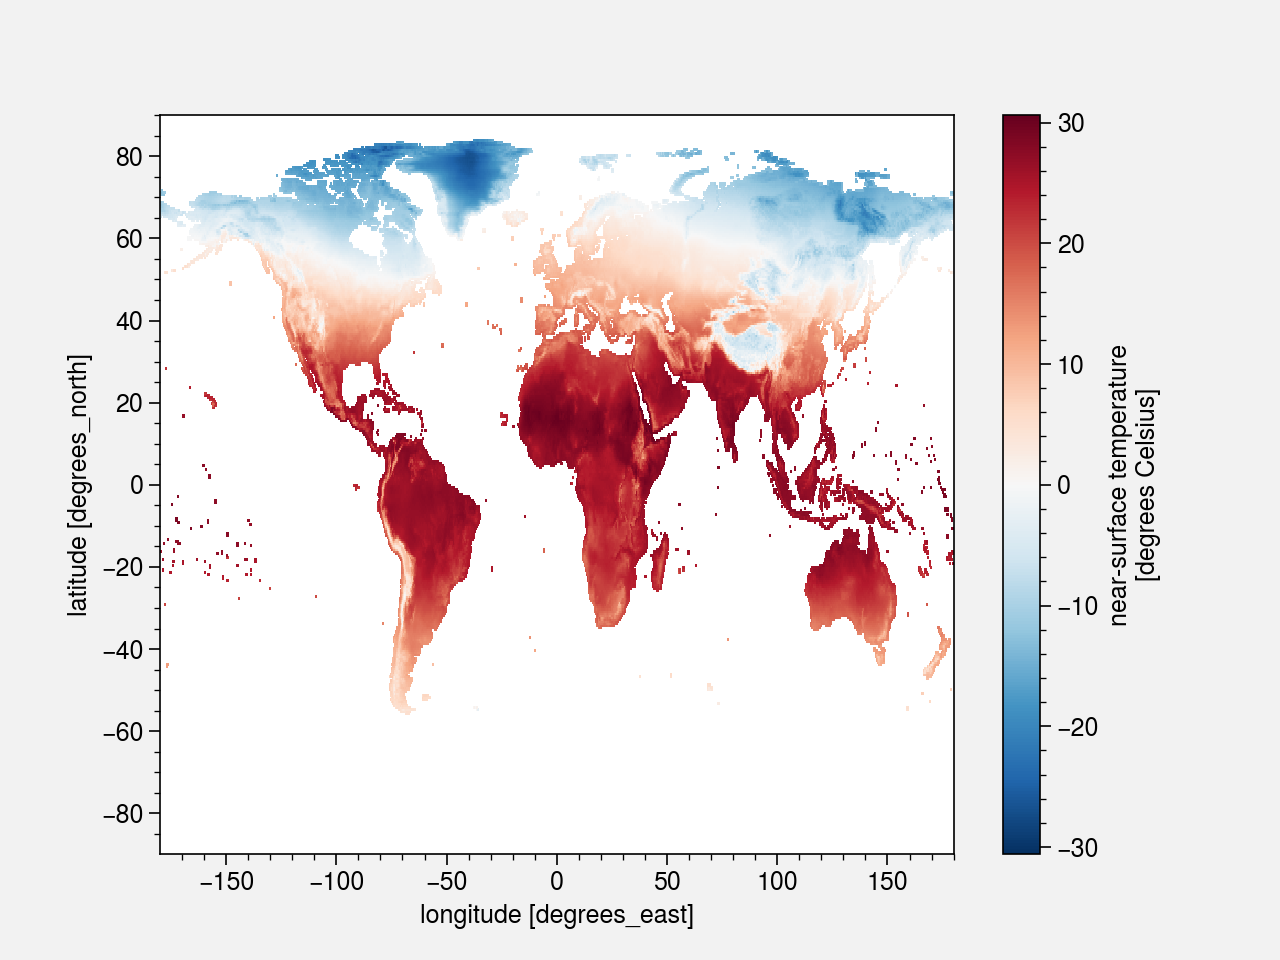

In [12]:
obs_longname = 'CRU TS v. 4.00'
obs_name = 'CRU'

obs = xr.open_dataset('/bdd/cru/cru_ts_4.00/data/tmp/cru_ts4.00.1901.2015.tmp.dat.nc').sel(time=period).tmp
obs_clim = u.clim(obs, calendar=obs.time.encoding['calendar'])
obs_clim.plot()

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 

Regrid towards HR-CM6 with lower resolution

In [15]:
# reuse_weights=False car les 2 ont le même nom...autrement il faut que je spécifie un nom particulier

regridder_obs = xe.Regridder(obs_clim, model_CM6_clim, 'bilinear', periodic=True, reuse_weights=False)
obs_clim_regrid = regridder_obs(obs_clim)

regridder_CM7 = xe.Regridder(model_CM7_clim, model_CM6_clim, 'bilinear', periodic=True, reuse_weights=False)
model_CM7_clim_regrid = regridder_CM7(model_CM7_clim)

Overwrite existing file: bilinear_360x720_361x512_peri.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: bilinear_360x720_361x512_peri.nc 
 You can set reuse_weights=True to save computing time.


# Plot differences

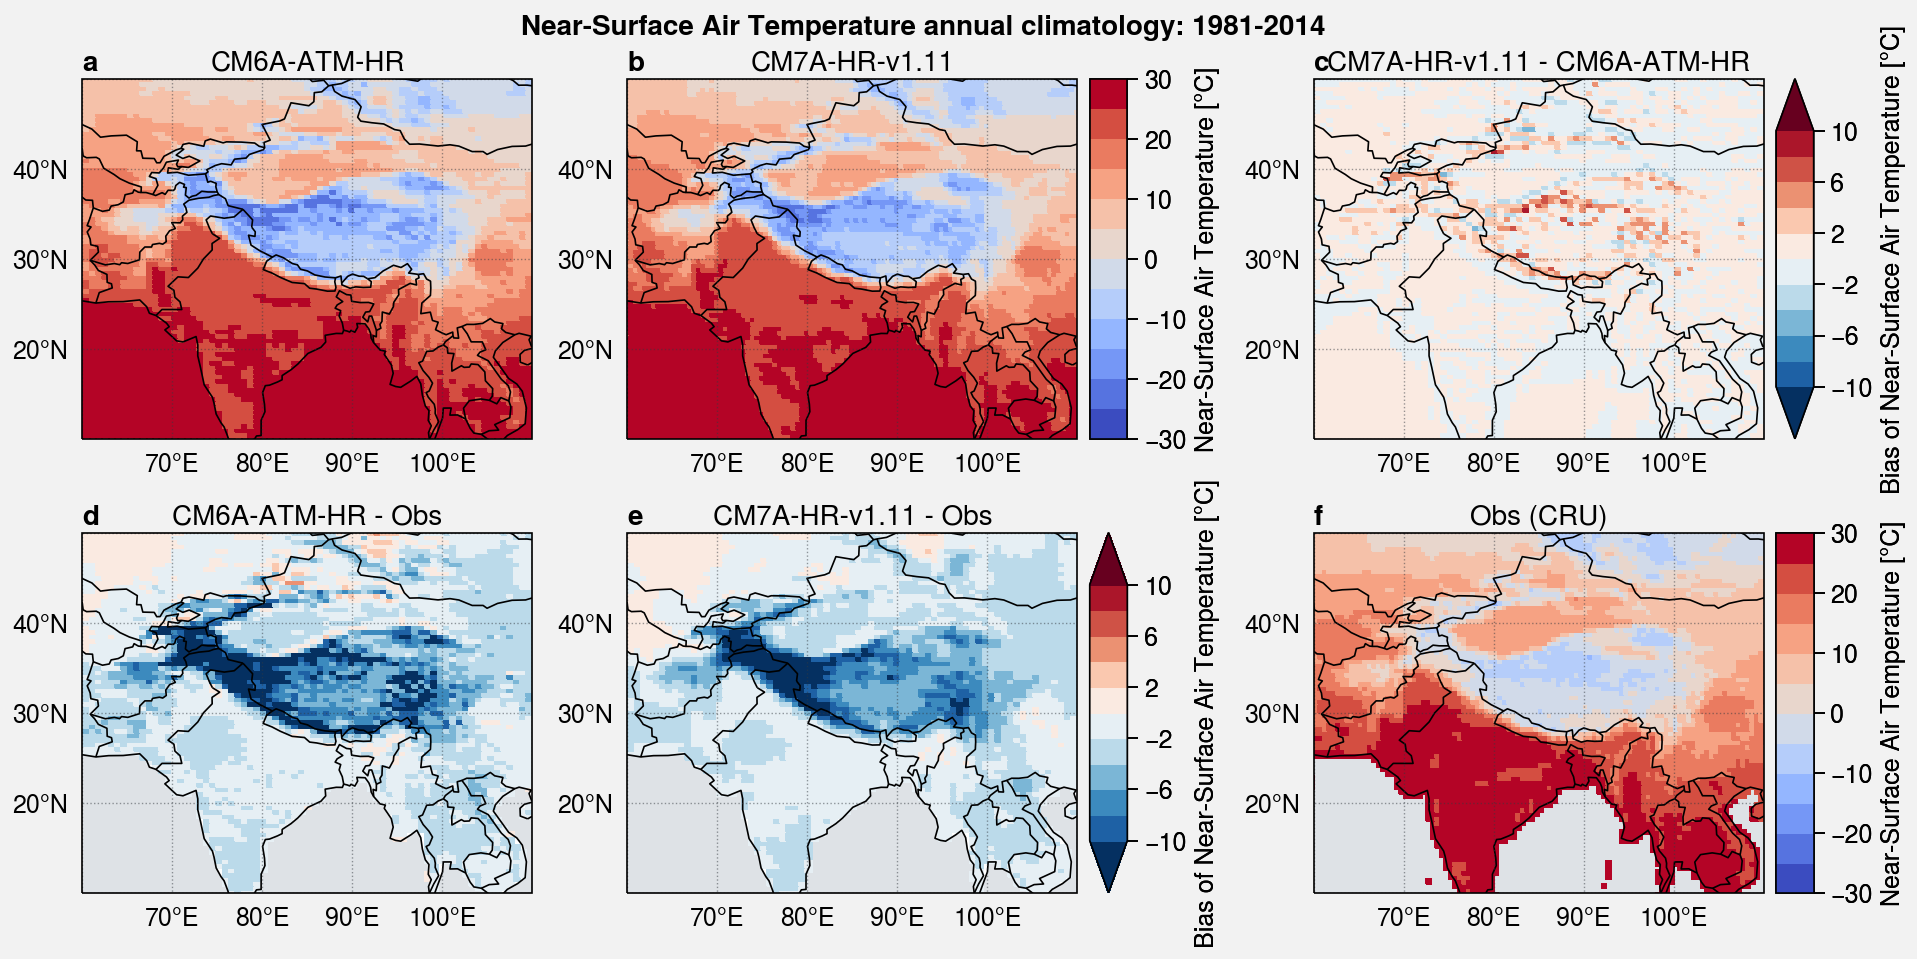

In [18]:
f, axs = plot.subplots(proj='cyl', ncols=3, nrows=2)

levels_diff = plot.arange(-10,10,2)
cmap_diff = 'BuRd'
extend_diff = 'both'

# First row: differences CM7A-HR-v1.11 / not guide
axs[0].pcolormesh(model_CM6_clim, cmap=cmap, levels=levels)
axs[0].format(title='CM6A-ATM-HR')

m1 = axs[1].pcolormesh(model_CM7_clim, cmap=cmap, levels=levels)
axs[1].format(title='CM7A-HR-v1.11')
axs[1].colorbar(m1, label=label+ ' ['+units+']')

m2 = axs[2].pcolormesh(model_CM7_clim_regrid - model_CM6_clim, cmap=cmap_diff, levels=levels_diff, extend=extend_diff)
axs[2].format(title='CM7A-HR-v1.11 - CM6A-ATM-HR')
axs[2].colorbar(m2, label='Bias of '+label+ ' ['+units+']')


# Second row: differences with obs

axs[3].pcolormesh(model_CM6_clim - obs_clim_regrid, cmap=cmap_diff, levels=levels_diff, extend=extend_diff)
axs[3].format(title='CM6A-ATM-HR - Obs')

axs[4].pcolormesh(model_CM7_clim_regrid - obs_clim_regrid, cmap=cmap_diff, levels=levels_diff, extend=extend_diff)
axs[4].format(title='CM7A-HR-v1.11 - Obs')
axs[4].colorbar(m2, label='Bias of '+label+ ' ['+units+']')

axs[5].pcolormesh(obs_clim, cmap=cmap, levels=levels)
axs[5].format(title='Obs ('+obs_name+')')
axs[5].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology: "+period.start+"-"+period.stop,
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

f.save('img/'+var+'_dynamico_'+period.start+'-'+period.stop+'.png')
f.save('img/'+var+'_dynamico_'+period.start+'-'+period.stop+'.pdf')